# HW1-EREN TUMKAYA-090190328

## Q1

 First thing I did, after reading the bullets carefully, was to start searching the [site](https://climateknowledgeportal.worldbank.org/) which was given to us in the instructions.    
 
 While doing that, I also checked whether those countries really have a border with mediterranian sea.

![Image of Mediterranian Map](https://cdn.britannica.com/10/6010-050-56184E94/Mediterranean-Sea.jpg)

Altough I had doubts about some, namely Bosnia and Herzegovina and Slovenia, I was able to find my answers with the following links, respectively: [Bosnia and Herzegovina border](https://www.britannica.com/place/Bosnia-and-Herzegovina) ,[Slovenia border](https://www.britannica.com/place/Slovenia).  


Finally I was confident that the statement "The Mediterranean Sea is bordered by following 22 countries" was reliable.

### Obtaining the Data 

 It took me quite some time to find out how to obtain the data, from the [dataportal](https://climateknowledgeportal.worldbank.org/download-data#htab-1500), required for this task. 
 
 Thanks to the Data Dictionary, I found Precipitation data with the code "pr" and surface temperature with "tas". In Data Acces Tool page I intended to create my API.
 
 Then I realised that I could only get an api link which included maximum of 3 countries as a condition. 
I tried to overcome this by selecting 3 countries, creating my api link and then adding the countries I required to the API link by hand. Main reason I did this was the instruction we were given on obtaining the data as one piece.  

 While I was adding "Palestine" I noticed that it wasn't on the list. I went back and looked at the map on the site. I managed to find out that it was called "[West Bank and Gaza](https://climateknowledgeportal.worldbank.org/country/west-bank-and-gaza)". Added it to the list as well.  
 
 Now I had an API link(which stated that it was a json file at the end of the link) but tbh I didn't remember the code to ingest it to my notebook. For this matter I checked our [Lecture 3](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-03.ipynb).Found out that I needed to import the library first and did it along with our famous pandas library.
 
 
 
 
 
 
 
 

In [4]:
import pandas as pd
from urllib.request import urlopen
import json

In [5]:
with urlopen("https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/REU,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,PSE,EGY,LBY,TUN,DZA,MAR,MLT,CYP,MCO,ESP?_format=json") as url:
    DataFrame = json.load(url)
DataFrame.keys()


dict_keys(['metadata', 'data'])

I tried to understand the json file by opening the file myseld on the browser. Also found a [site](https://realpython.com/python-json/) to find out how I can deal with json files .   
Then I realised that I could just change the "format=json" extension to "format=xlsx" and opened it on the browser. For me, who didn't have prior experience with API links, it was a magnificient discovery to see that it opened up as a two worksheet excel.

In [6]:
Pr_Tas_DataFrame=pd.read_excel("https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/REU,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,PSE,EGY,LBY,TUN,DZA,MAR,MLT,CYP,MCO,ESP?_format=xlsx")

I needed to seperate these worksheets in order to work with "precipitation" and "average mean surface", as expected from me. Here I used the help of Chat GPT. My question and answer can be seen [here](https://chat.openai.com/share/1050c43f-a44a-4d8b-b63d-4106582585c6)  

At this very moment, I realised that I made a mistake, I was supposed to obtain the data and before using "read_excel" , had to indicate two worksheets. I don't delete my mistaken previous row in order for it to be informative of my work but I followed another path from now on.

In [7]:
API_EXCEL="https://cckpapi.worldbank.org/cckp/v1/era5-x0.5_timeseries_pr,tas_timeseries_monthly_1950-2020_mean_historical_era5_era5_mean/REU,ITA,SVN,HRV,BIH,MNE,ALB,GRC,TUR,SYR,LBN,ISR,PSE,EGY,LBY,TUN,DZA,MAR,MLT,CYP,MCO,ESP?_format=xlsx"

For this part I needed to know the names of the worksheets and what my excel looked like. Well, since it popped up on my browser when I opened the link, I knew it already. I had two worksheets named "pr" and "tas", respectively.

In [8]:
surface_temp=pd.read_excel(API_EXCEL,sheet_name="tas" )
precipitation=pd.read_excel(API_EXCEL,sheet_name="pr" )

surface_temp.info()
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 854 entries, code to 2020-12
dtypes: float64(852), object(2)
memory usage: 146.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 854 entries, code to 2020-12
dtypes: float64(852), object(2)
memory usage: 146.9+ KB


Since I wanted to check if I obtained both of the seperate files, I wanted to see some rows and columns.

In [9]:
surface_temp.head(22)

,code,name,1950-01,1950-02,1950-03,1950-04,1950-05,1950-06,1950-07,1950-08,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,ALB,Albania,0.39,4.68,7.35,11.63,16.16,20.35,25.01,23.62,...,8.37,11.20,16.04,18.50,22.68,23.05,20.25,13.81,8.99,7.46
1,BIH,Bosnia and Herzegovina,-3.92,1.36,4.82,9.19,14.71,19.53,23.06,22.04,...,6.07,10.45,13.59,17.42,19.81,20.98,17.06,11.35,6.08,4.27
2,CYP,Cyprus,9.83,10.75,13.85,18.01,19.95,24.39,26.68,26.38,...,14.99,17.37,21.99,23.84,28.02,28.54,28.07,24.68,19.03,15.94
3,DZA,Algeria,10.01,12.80,16.29,21.04,26.50,32.33,32.86,32.04,...,19.92,25.13,29.62,33.40,34.90,34.73,31.43,25.51,18.39,14.55
4,EGY,Arab Republic of Egypt,11.83,12.59,16.98,23.50,25.64,28.23,29.88,29.32,...,18.82,22.42,27.21,29.81,30.61,31.00,30.18,26.33,18.37,16.35
5,ESP,Spain,4.97,7.33,9.37,11.02,14.46,20.31,24.11,22.07,...,10.20,12.71,17.77,19.61,24.58,23.34,19.55,13.58,11.24,7.17
6,GRC,Greece,2.60,6.77,8.60,13.98,17.61,22.01,25.79,24.78,...,10.44,12.36,17.90,21.15,24.73,24.76,22.40,17.33,11.36,10.12
7,HRV,Croatia,-1.35,3.51,7.25,10.85,16.95,21.85,24.88,23.76,...,7.99,12.42,15.52,19.68,22.04,23.09,18.57,13.00,7.41,5.42
8,ISR,Israel,9.35,9.79,14.36,20.61,21.74,24.31,26.40,25.90,...,15.85,18.60,23.59,25.15,27.74,27.92,28.64,25.07,18.39,15.21
9,ITA,Italy,2.59,5.40,7.71,9.89,15.65,20.72,24.35,22.52,...,8.24,12.07,16.57,19.15,22.68,23.38,19.49,13.26,10.29,6.34


In [10]:
precipitation.head(22)

,code,name,1950-01,1950-02,1950-03,1950-04,1950-05,1950-06,1950-07,1950-08,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,ALB,Albania,97.35,87.45,57.06,108.63,39.78,23.41,3.25,15.54,...,157.89,92.07,62.65,78.24,23.64,57.18,113.53,185.30,12.27,201.66
1,BIH,Bosnia and Herzegovina,78.33,87.53,81.82,85.88,33.80,20.94,23.37,13.63,...,80.71,39.42,113.40,131.63,65.13,119.86,85.74,147.62,34.98,177.84
2,CYP,Cyprus,68.26,30.95,54.18,32.61,34.12,2.59,0.57,0.44,...,59.12,30.97,11.22,0.97,0.20,0.70,1.62,2.31,97.35,74.32
3,DZA,Algeria,9.54,3.24,5.26,5.48,4.34,0.79,0.25,3.21,...,8.38,14.20,3.07,1.45,1.34,1.41,4.49,1.36,4.55,6.36
4,EGY,Arab Republic of Egypt,2.65,1.60,0.90,0.94,1.22,0.62,2.60,1.16,...,16.34,0.29,0.70,0.04,0.18,0.13,0.22,0.50,2.76,1.01
5,ESP,Spain,29.45,57.43,37.33,33.08,71.20,26.27,8.92,17.71,...,93.33,103.34,60.34,43.81,14.45,28.52,41.17,70.78,71.89,74.47
6,GRC,Greece,86.34,59.23,90.62,67.39,42.14,18.37,1.95,2.74,...,108.99,100.38,48.77,41.73,21.89,34.55,52.62,47.51,35.34,154.60
7,HRV,Croatia,87.53,78.08,48.30,98.04,19.68,18.86,22.34,14.64,...,61.25,26.84,81.34,101.21,62.88,125.63,94.17,171.13,42.62,166.63
8,ISR,Israel,58.02,37.63,30.46,5.36,6.65,0.44,0.99,0.54,...,68.79,18.80,8.63,1.41,0.59,1.72,1.32,1.06,43.54,27.34
9,ITA,Italy,72.88,82.85,42.86,115.70,44.61,34.81,19.90,44.03,...,101.03,58.99,77.56,105.68,49.01,90.75,86.94,129.30,52.25,177.42


## Operations on the Data

Both seems fine, I want to transpose them though. It will convert them into a form which I am more used to seeing. Also I don't see a point of keeping the code column (row when transposed). I wanted to write a function since I will be using these operations on both sheets.

In [11]:
def operations(df):
    df1=df.copy()
    df1=df1.drop("code",axis="columns")
    df1=df1.transpose()
    df1.reset_index(inplace=True)
    headers=df1.iloc[0]
    df1=pd.DataFrame(df1.values[1:],columns=headers)
    df1 = df1.rename(columns={'name': "Dates"})
    return df1


Writing this code took so much time of mine, I thought transposing would be an easy task. Well, I had so many problems with indexes.First problem I had was the fact that my indexes went to be column indexes. I tried to solve this issue by checking many sources. One youtube [video](https://www.youtube.com/watch?v=6AjYmHLHlpY) gave me some sort of solution.    

I was able to set my headers to countries as I wanted. However, solution came with another problem; My date rows were gone and replaced by indexes. Since I didnt have indexes in the rows (when I transposed), I thought of the idea of adding row indexes and doing the operation in the video. Well, it worked. I should give some credit to [page](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html), I visited this page quite a few times.
Now the only problem seemed like "name"  column which was supposed to be the "date" column. I added that function as well. We used this function(df.rename) in our class "Computational Data Science"(which I am taking this semester) that is how I was aware of its name and usage.  

One thing to note here, I was running all the codes in this function one by one to find out problems, I am adding it as a function because I have two sheets in the same format and was tasked to not use same operations again. 

Another thing to note here, I changed all my files and added the dataframe.copy() functions. I didn't want to change the actual dataframes with my functions because I faced many errors near the end of this task. I wanted to create new dataframe names after each function although it seemed hard at first, it was easier to follow.Here is the [log](https://chat.openai.com/share/acd534e2-7dd7-4530-b472-219e20b80e20) where I had my tip to do that.





In [12]:
new_surface=operations(surface_temp)
new_precipitation=operations(precipitation)
new_surface.head()

,Dates,Albania,Bosnia and Herzegovina,Cyprus,Algeria,Arab Republic of Egypt,Spain,Greece,Croatia,Israel,...,Morocco,Monaco,Malta,Montenegro,West Bank and Gaza,France,Slovenia,Syrian Arab Republic,Tunisia,Türkiye
0,1950-01,0.39,-3.92,9.83,10.01,11.83,4.97,2.6,-1.35,9.35,...,8.05,4.7,13.78,-3.41,8.65,23.49,-3.14,2.59,8.11,-5.39
1,1950-02,4.68,1.36,10.75,12.8,12.59,7.33,6.77,3.51,9.79,...,11.16,7.06,14.09,1.11,8.77,23.25,1.67,4.58,10.42,-2.45
2,1950-03,7.35,4.82,13.85,16.29,16.98,9.37,8.6,7.25,14.36,...,13.75,8.8,14.23,4.02,13.26,22.47,5.8,11.83,12.71,3.96
3,1950-04,11.63,9.19,18.01,21.04,23.5,11.02,13.98,10.85,20.61,...,15.34,9.91,16.27,8.53,19.71,21.97,8.33,20.23,16.41,12.38
4,1950-05,16.16,14.71,19.95,26.5,25.64,14.46,17.61,16.95,21.74,...,18.47,15.33,18.84,13.48,21.09,19.58,14.92,21.82,22.01,14.5


In [13]:
surface_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Columns: 854 entries, code to 2020-12
dtypes: float64(852), object(2)
memory usage: 146.9+ KB


In [14]:
new_precipitation.head()

,Dates,Albania,Bosnia and Herzegovina,Cyprus,Algeria,Arab Republic of Egypt,Spain,Greece,Croatia,Israel,...,Morocco,Monaco,Malta,Montenegro,West Bank and Gaza,France,Slovenia,Syrian Arab Republic,Tunisia,Türkiye
0,1950-01,97.35,78.33,68.26,9.54,2.65,29.45,86.34,87.53,58.02,...,32.07,28.89,103.62,107.09,88.79,249.4,85.96,55.2,34.08,103.27
1,1950-02,87.45,87.53,30.95,3.24,1.6,57.43,59.23,78.08,37.63,...,6.46,103.63,84.78,135.64,55.55,115.32,85.2,22.35,27.17,44.62
2,1950-03,57.06,81.82,54.18,5.26,0.9,37.33,90.62,48.3,30.46,...,10.2,48.47,55.22,73.45,41.02,177.42,35.55,33.56,36.09,68.85
3,1950-04,108.63,85.88,32.61,5.48,0.94,33.08,67.39,98.04,5.36,...,15.54,88.26,26.42,133.9,9.01,214.87,152.15,11.86,29.81,46.07
4,1950-05,39.78,33.8,34.12,4.34,1.22,71.2,42.14,19.68,6.65,...,17.88,46.76,3.61,52.71,12.4,59.87,37.82,23.34,10.05,101.8


Now it looks like it is in a really good shape to do my analysis. There are two important things that I need to do after having this table.   

Firstly, I need to check whether my datas have duplicates. This could have occured if same dates are written twice. If that is the case I need to delete them.

In [15]:
new_surface[new_surface["Dates"].duplicated()].shape

(0, 23)

In [16]:
new_precipitation[new_precipitation["Dates"].duplicated()].shape

(0, 23)

Both seem fine. Now I will check whether I have any null values in my sheets.

In [17]:
new_surface.isnull().sum()

0
Dates                     0
Albania                   0
Bosnia and Herzegovina    0
Cyprus                    0
Algeria                   0
Arab Republic of Egypt    0
Spain                     0
Greece                    0
Croatia                   0
Israel                    0
Italy                     0
Lebanon                   0
Libya                     0
Morocco                   0
Monaco                    0
Malta                     0
Montenegro                0
West Bank and Gaza        0
France                    0
Slovenia                  0
Syrian Arab Republic      0
Tunisia                   0
Türkiye                   0
dtype: int64

In [18]:
new_precipitation.isnull().sum()

0
Dates                     0
Albania                   0
Bosnia and Herzegovina    0
Cyprus                    0
Algeria                   0
Arab Republic of Egypt    0
Spain                     0
Greece                    0
Croatia                   0
Israel                    0
Italy                     0
Lebanon                   0
Libya                     0
Morocco                   0
Monaco                    0
Malta                     0
Montenegro                0
West Bank and Gaza        0
France                    0
Slovenia                  0
Syrian Arab Republic      0
Tunisia                   0
Türkiye                   0
dtype: int64

Again, both seem fine and now I move on to check datatypes of my table, I will correct them if anything is wrong. Apart from that, I need to change the data column and seperate it into two columns as "year" and "month" .This will help me group them by both seperately and fulfill the tasks.

In [19]:
new_precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Dates                   852 non-null    object
 1   Albania                 852 non-null    object
 2   Bosnia and Herzegovina  852 non-null    object
 3   Cyprus                  852 non-null    object
 4   Algeria                 852 non-null    object
 5   Arab Republic of Egypt  852 non-null    object
 6   Spain                   852 non-null    object
 7   Greece                  852 non-null    object
 8   Croatia                 852 non-null    object
 9   Israel                  852 non-null    object
 10  Italy                   852 non-null    object
 11  Lebanon                 852 non-null    object
 12  Libya                   852 non-null    object
 13  Morocco                 852 non-null    object
 14  Monaco                  852 non-null    object
 15  Malta 

It seems like all my values are objects. I need to change the first one to "date" and the others to "float" format.I knew how to do it one by one with "astype" but thanks to [chat_gpt](https://chat.openai.com/share/5648bf34-7e9e-4c43-9313-bdc9835a0a52) I also learned how to change all. I wil define a function to do that because I need to perform this on both sheets.

In [20]:
def typecorrect(df):
     df1=df.copy()
     df1['Dates'] = pd.to_datetime(df1['Dates'])
     for col in df1.columns[1:]:
        df1[col]=df1[col].astype(float)
     return df1


In [21]:
corrected_surface=typecorrect(new_surface)
corrected_precipitation=typecorrect(new_precipitation)

In [22]:
corrected_surface.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Dates                   852 non-null    datetime64[ns]
 1   Albania                 852 non-null    float64       
 2   Bosnia and Herzegovina  852 non-null    float64       
 3   Cyprus                  852 non-null    float64       
 4   Algeria                 852 non-null    float64       
 5   Arab Republic of Egypt  852 non-null    float64       
 6   Spain                   852 non-null    float64       
 7   Greece                  852 non-null    float64       
 8   Croatia                 852 non-null    float64       
 9   Israel                  852 non-null    float64       
 10  Italy                   852 non-null    float64       
 11  Lebanon                 852 non-null    float64       
 12  Libya                   852 non-null    float64   

Now, in order to be able to group my data by months and years, I will seperate the date column. I will use a method which was shown to us in "Comptutational Data Science " class exercises.  
Again , I am defining a function so that I can use it in both sheets.

In [23]:
import calendar
def seperate_date(df):
    df1=df.copy()
    year = df1['Dates'].dt.year
    month = df1['Dates'].dt.month
    df1.insert(1,"Years",year)
    df1.insert(1,"Months",month)
    return df1


I got so many errors and checked our exercises again, I needed to import calender.It worked that way.

In [24]:
Seperated_Surface=seperate_date(corrected_surface)
Seperated_Precipitation=seperate_date(corrected_precipitation)

Seperated_Surface.head(13)

,Dates,Months,Years,Albania,Bosnia and Herzegovina,Cyprus,Algeria,Arab Republic of Egypt,Spain,Greece,...,Morocco,Monaco,Malta,Montenegro,West Bank and Gaza,France,Slovenia,Syrian Arab Republic,Tunisia,Türkiye
0,1950-01-01,1,1950,0.39,-3.92,9.83,10.01,11.83,4.97,2.60,...,8.05,4.70,13.78,-3.41,8.65,23.49,-3.14,2.59,8.11,-5.39
1,1950-02-01,2,1950,4.68,1.36,10.75,12.80,12.59,7.33,6.77,...,11.16,7.06,14.09,1.11,8.77,23.25,1.67,4.58,10.42,-2.45
2,1950-03-01,3,1950,7.35,4.82,13.85,16.29,16.98,9.37,8.60,...,13.75,8.80,14.23,4.02,13.26,22.47,5.80,11.83,12.71,3.96
3,1950-04-01,4,1950,11.63,9.19,18.01,21.04,23.50,11.02,13.98,...,15.34,9.91,16.27,8.53,19.71,21.97,8.33,20.23,16.41,12.38
4,1950-05-01,5,1950,16.16,14.71,19.95,26.50,25.64,14.46,17.61,...,18.47,15.33,18.84,13.48,21.09,19.58,14.92,21.82,22.01,14.50
5,1950-06-01,6,1950,20.35,19.53,24.39,32.33,28.23,20.31,22.01,...,23.80,20.11,23.51,17.70,24.06,18.43,19.33,26.05,26.91,18.08
6,1950-07-01,7,1950,25.01,23.06,26.68,32.86,29.88,24.11,25.79,...,27.93,23.73,26.13,21.98,26.23,17.26,21.87,28.52,28.76,21.77
7,1950-08-01,8,1950,23.62,22.04,26.38,32.04,29.32,22.07,24.78,...,25.90,21.78,26.61,20.62,25.80,17.04,20.39,27.30,28.35,21.51
8,1950-09-01,9,1950,20.08,17.23,25.08,29.39,27.17,19.22,22.46,...,22.21,17.94,25.10,16.67,24.89,17.24,15.34,25.46,25.95,20.09
9,1950-10-01,10,1950,13.63,9.78,21.29,22.92,23.28,14.81,15.96,...,16.57,14.48,22.00,10.21,21.49,19.21,8.25,19.14,19.96,11.29


## Grouping and Visualizing Data

Now I will group my data by months and find the averages of each month for each country. Again I will be doing that with a function.

In [25]:
def group_by_month(df):
    df1=df.copy()
    df1=df1.iloc[:,3:25].groupby(df1["Months"]).mean()
    return df1
    
    
 

Here, I went back to our second [class notes](https://github.com/kaygun/2023-Fall-381E/blob/main/lectures/lecture-02.ipynb) to remember group by once again.I believe I wont need to do that anymore. Also I used the iloc which I learned earlier.

<Axes: xlabel='Months', ylabel='Average Surface Temperature'>

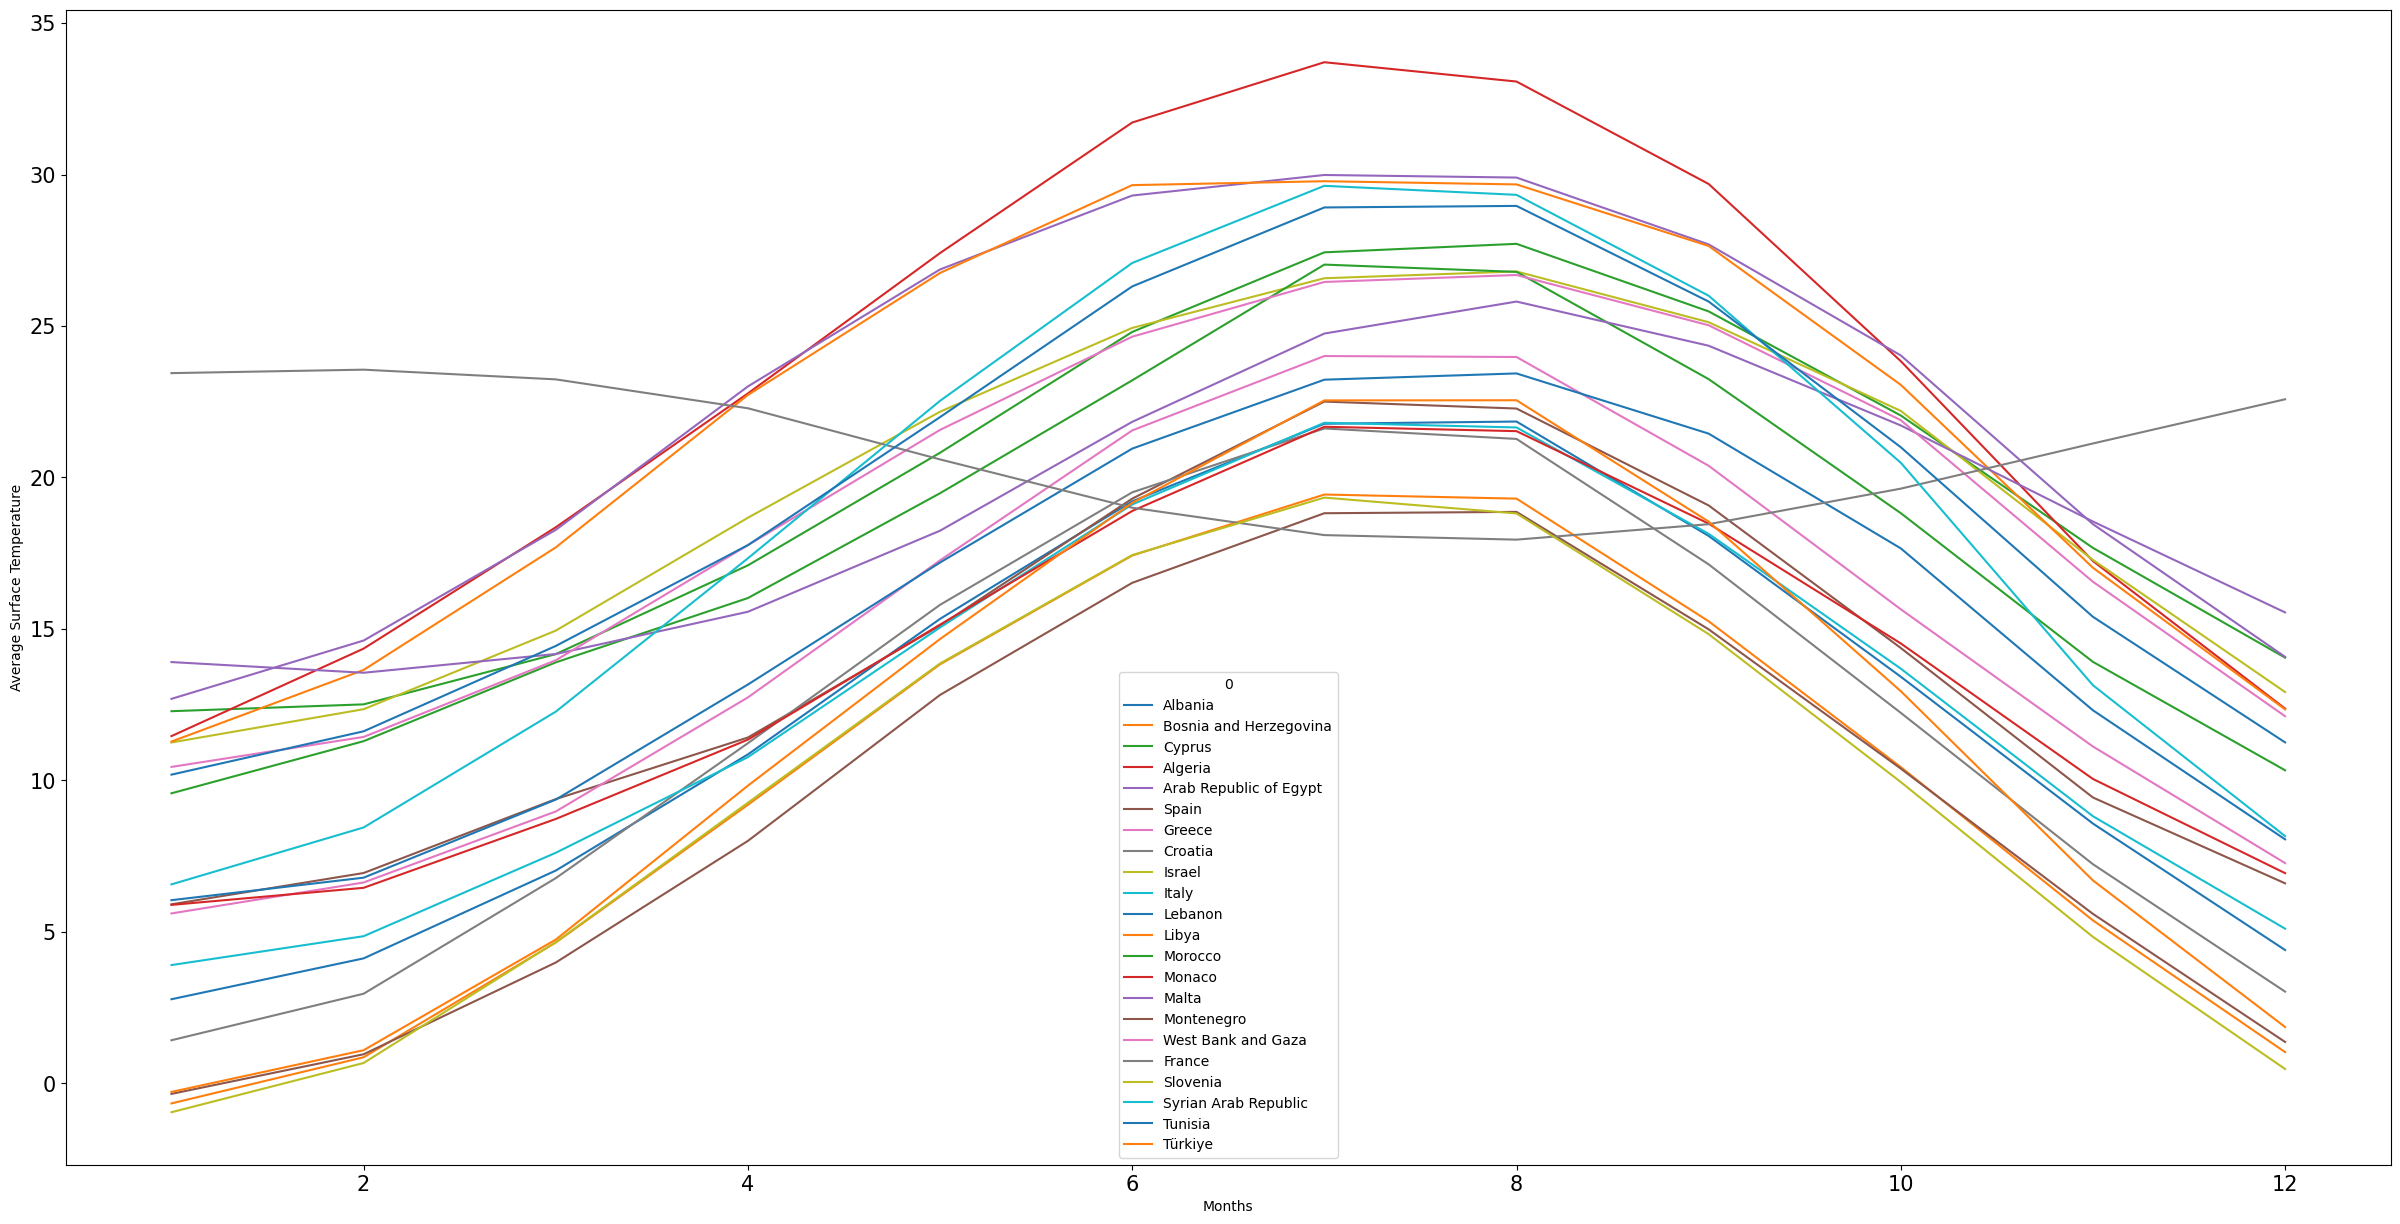

In [40]:
MAST=group_by_month(Seperated_Surface)
MAPR=group_by_month(Seperated_Precipitation)

MAST.plot(figsize=(30,15),ylabel="Average Surface Temperature",fontsize=15)


At this very moment it was impossible to not notice the different pattern. France had something going on which was off.I wanted to plot it in order to see.

<Axes: xlabel='Months'>

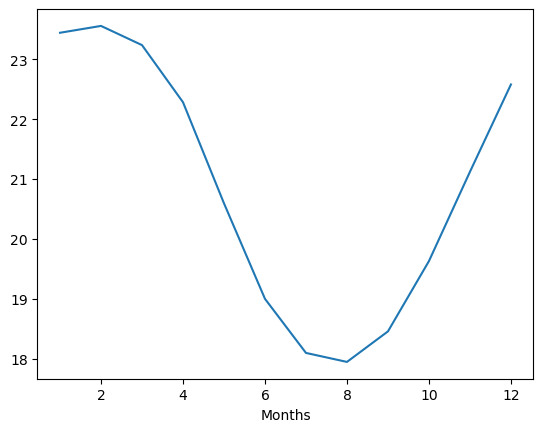

In [35]:
MAST["France"].plot()

Altough I knew it was impossible for it to be like this, I checked the ["France" page](https://climateknowledgeportal.worldbank.org/country/france/climate-data-historical) for the numbers. Here, there was a graph from 1991 to 2020 (monthly average) and it was nowhere near mine. I believe I can say that the data I obtained was wrong for France. 

In [ ]:
MAST.plot(subplots=True,figsize=(30,70))

<Axes: xlabel='Months'>

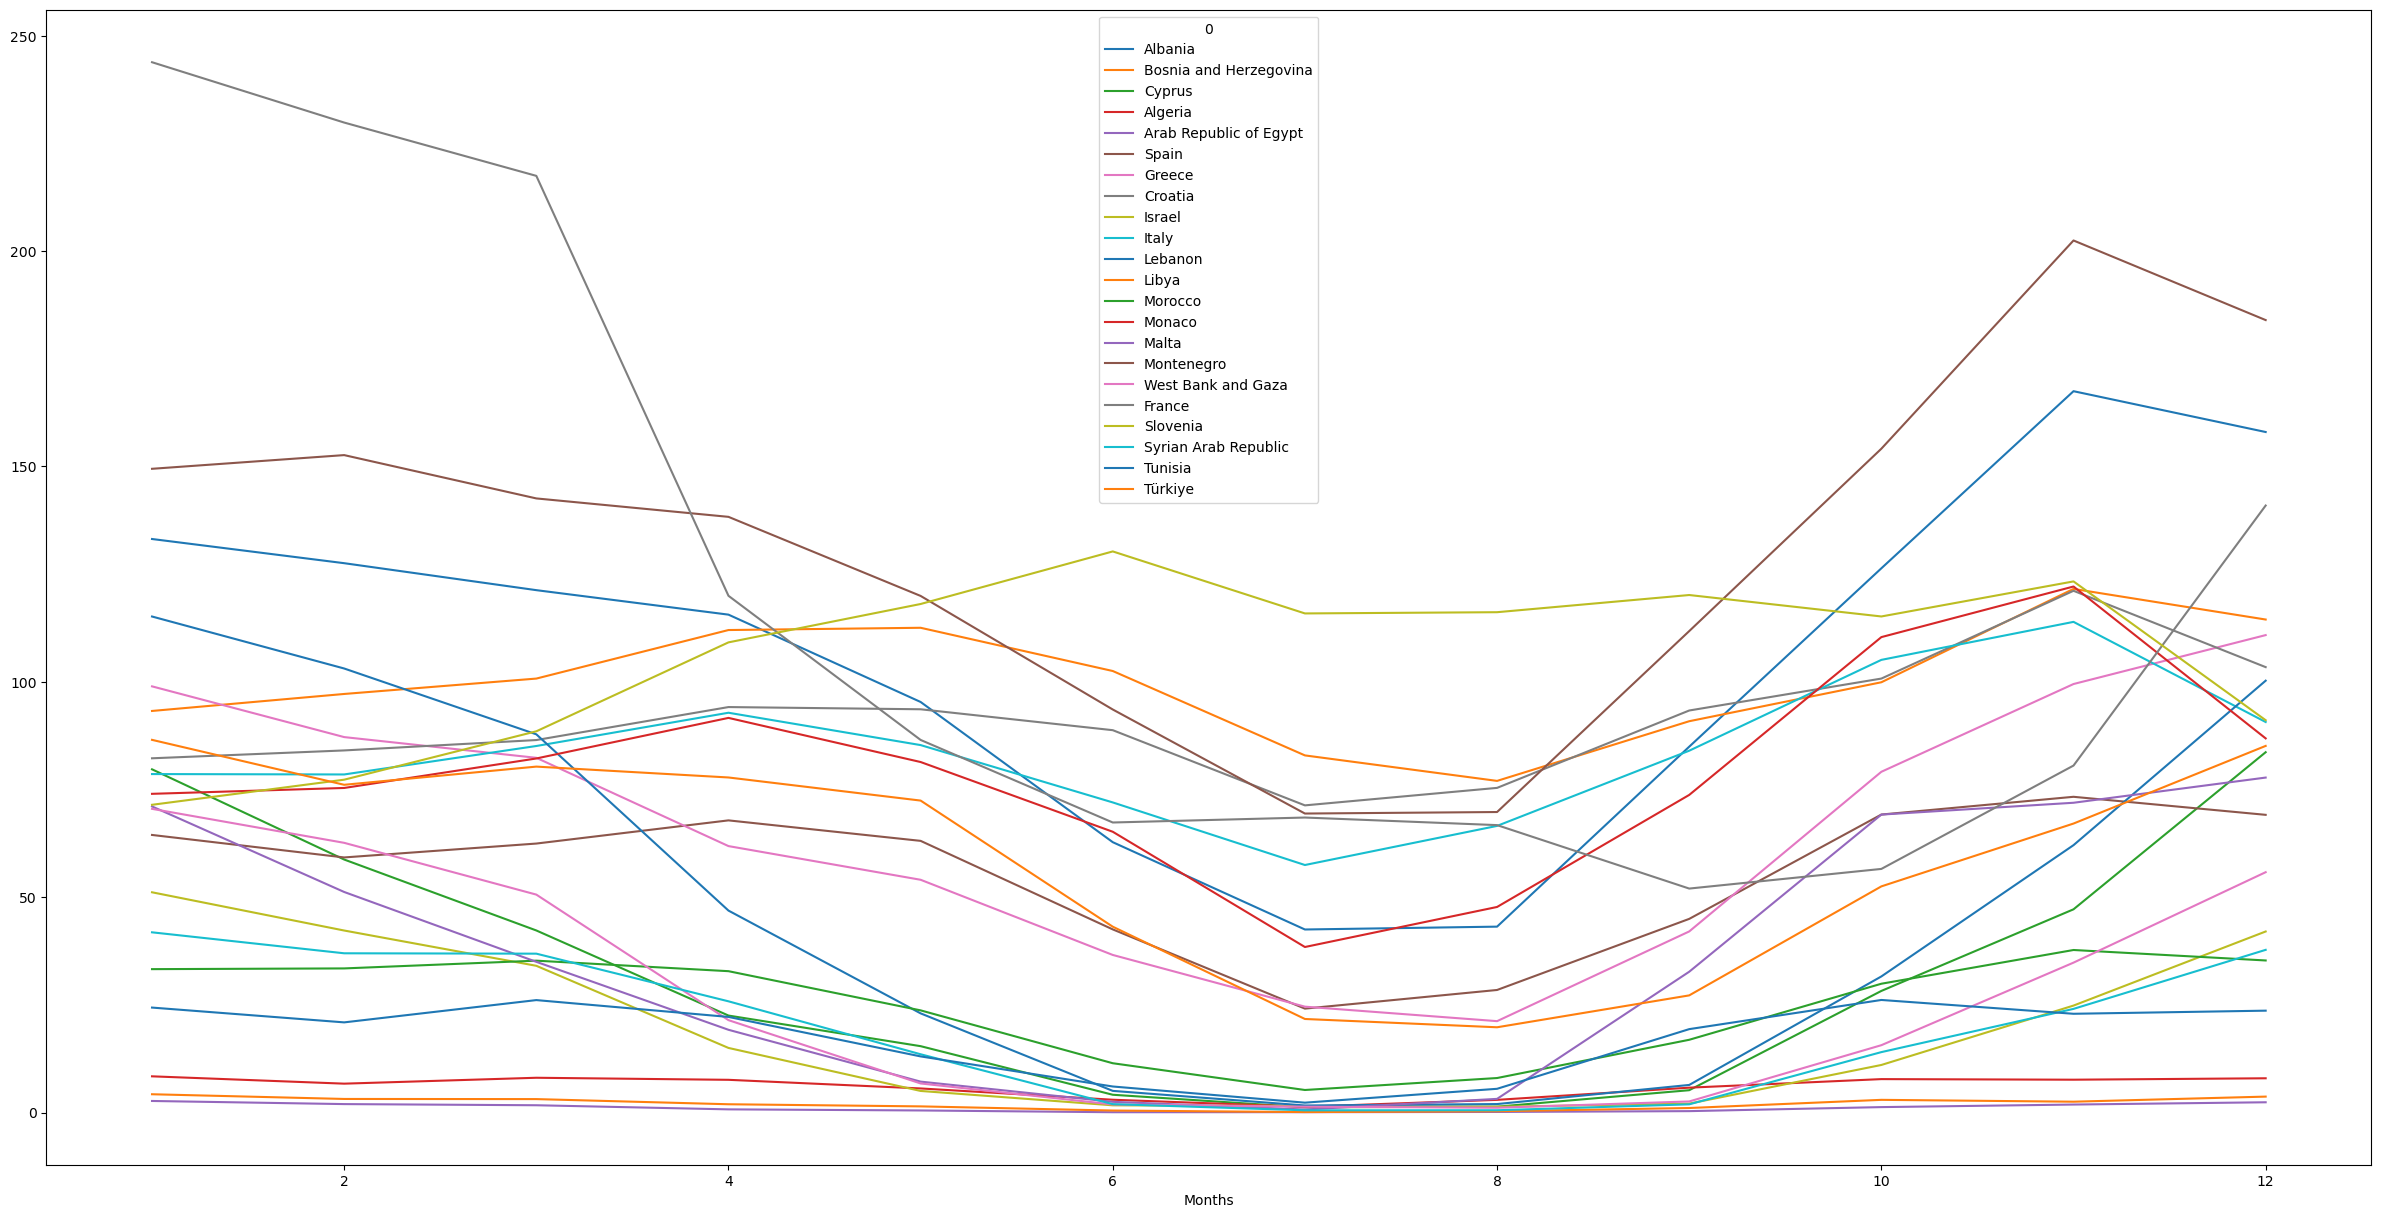

In [37]:
MAPR.plot(figsize=(30,15))

## Q2

## Obtaining the Data

I wanted to see to what extend I can use LLM's in order to make my work easier. I wrote [this](https://chat.openai.com/share/8ad72c76-5b70-474c-bb0b-79fea6005b95) to understand how I can get the data.

In [50]:
!pip install yfinance
import yfinance as yf

Well, first problem here was the fact that the chat gpt (my version to be precise) was not up to date. So, I had to check all these codes in the stock market. They could have been changed. So, I checked the site [yahoo finance](https://finance.yahoo.com/) in order to check whether my codes were correct or not.Not to my surprise I needed to change "FB" to "META" .  

Also, the chat gpt gave me the codes for xiaomi and samsung in their own country. But at some point in my work, I had problems with the null dates. After checking the null values, I wanted search one myself.For instance, all US stocks were Null on the day of 21.01.2021. I didn't know that it was this [date](https://www.indystar.com/story/news/2019/01/09/martin-luther-king-jr-day-2019-postal-service-closings-and-more/2525664002/) which is a national holliday. What I did was to find the samsung and xiaomi stocks in US markets(to get rid of the hollidays in US stocks). I believe we were not limited to using stocks from their original country.But that also had problems, those datas were limited and the samsung us datas seemed not to be fine. Hence I returned back to using the original codes after some point.






In [92]:



symbols = ['GOOGL', 'META', 'CSCO', 'INTC', 'AMD', 'QCOM', 'AAPL', '1810.HK', '005930.KS', 'TSLA']


start_date = '2019-01-01'
end_date = '2022-12-31'


data_stocks = yf.download(symbols, start=start_date, end=end_date)

data_stocks.head(20)


[*********************100%%**********************]  10 of 10 completed


Adj Close                                                      \
               005930.KS 1810.HK       AAPL        AMD       CSCO      GOOGL   
Date                                                                           
2019-01-02  34113.542969   12.20  37.943260  18.830000  36.906475  52.734001   
2019-01-03  33101.136719   11.76  34.163830  17.049999  35.564247  51.273499   
2019-01-04  32969.085938   11.96  35.622261  19.000000  37.166245  53.903500   
2019-01-07  34113.542969   12.00  35.542973  20.570000  37.417366  53.796001   
2019-01-08  33541.316406   11.10  36.220520  20.750000  37.720455  54.268501   
2019-01-09  34861.835938   10.34  36.835609  20.190001  37.512623  54.082500   
2019-01-10  35037.910156    9.97  36.953358  19.740000  37.443352  53.941502   
2019-01-11  35654.152344   10.34  36.590546  20.270000  37.659836  53.223499   
2019-01-14  35257.980469   10.02  36.040321  20.230000  37.417366  52.575500   
2019-01-15  36182.359375    9.96  36.777958  20.379999  38.118786  54.325500   
2019-01-16  36490.484375    9.70  37.227245  19.730000  38.066818  54.475498   
2019-01-17  36930.660156    9.74  37.448303  20.250000  38.283306  54.956001   
2019-01-18  37238.773438   10.16  37.678959  20.770000  38.993389  55.365002   
2019-01-21  37634.949219   10.30        NaN        NaN        NaN        NaN   
2019-01-22  37106.722656   10.00  36.833214  19.760000  38.776905  53.931499   
2019-01-23  36974.671875    9.97  36.982178  19.799999  39.365734  54.220501   
2019-01-24  37899.039062   10.00  36.689053  20.850000  39.495632  54.200001   
2019-01-25  39395.632812   10.10  37.904812  21.930000  39.945915  55.075500   
2019-01-28  39659.738281   10.02  37.554028  20.180000  39.616867  53.993000   
2019-01-29  40055.886719    9.91  37.164780  19.250000  39.798706  53.502998   

                                                         ...      Volume  \
                 INTC        META       QCOM       TSLA  ...   005930.KS   
Date                                                     ...               
2019-01-02  41.195721  135.679993  50.844700  20.674667  ...   7847664.0   
2019-01-03  38.929428  131.740005  49.338848  20.024000  ...  12471493.0   
2019-01-04  41.318214  137.949997  50.136074  21.179333  ...  14108958.0   
2019-01-07  41.510719  138.050003  49.994339  22.330667  ...  12748997.0   
2019-01-08  41.773232  142.529999  49.560303  22.356667  ...  12756554.0   
2019-01-09  42.009476  144.229996  50.144920  22.568666  ...  17452708.0   
2019-01-10  42.490742  144.199997  50.313225  22.997999  ...  14731699.0   
2019-01-11  42.814499  143.800003  50.933289  23.150667  ...  11661063.0   
2019-01-14  42.306984  145.389999  50.756130  22.293333  ...  11984996.0   
2019-01-15  42.525742  148.949997  49.365425  22.962000  ...  11492756.0   
2019-01-16  42.114479  147.539993  48.957958  23.070000  ...   8491595.0   
2019-01-17  42.411991  148.300003  48.515064  23.153999  ...  11736903.0   
2019-01-18  43.041996  150.039993  48.957958  20.150667  ...  11029256.0   
2019-01-21        NaN         NaN        NaN        NaN  ...  11355701.0   
2019-01-22  42.236984  147.570007  48.089890  19.927999  ...   9964356.0   
2019-01-23  41.948219  144.300003  45.857674  19.172667  ...  11071079.0   
2019-01-24  43.540752  145.830002  45.007309  19.434000  ...  14747623.0   
2019-01-25  41.160721  149.009995  45.441353  19.802668  ...  22789395.0   
2019-01-28  40.871964  147.470001  44.856720  19.758667  ...  17998914.0   
2019-01-29  40.723209  144.190002  43.758331  19.830667  ...  16215017.0   

                                                                           \
                1810.HK         AAPL          AMD        CSCO       GOOGL   
Date                                                                        
2019-01-02   32515761.0  148158800.0   87148700.0  23833500.0  31868000.0   
2019-01-03   38910146.0  365248800.0  117277600.0  29606700.0  41960000.0   
2019-01-04   25943844.0  234428400.0  11

In [93]:
data_stocks.tail(20)

Adj Close                                                       \
               005930.KS 1810.HK        AAPL        AMD       CSCO      GOOGL   
Date                                                                            
2022-12-05  59284.457031   11.50  146.007080  73.620003  47.862869  99.480003   
2022-12-06  58202.976562   11.28  142.302872  70.269997  47.144875  96.980003   
2022-12-07  57908.027344   10.68  140.341248  70.139999  46.747070  94.940002   
2022-12-08  58202.976562   11.04  142.043976  70.470001  47.532986  93.709999   
2022-12-09  59382.769531   11.48  141.556061  68.589996  47.018745  92.830002   
2022-12-12  58497.929688   11.18  143.876160  70.669998  47.833759  93.309998   
2022-12-13  58694.558594   11.20  144.852005  71.650002  48.163647  95.629997   
2022-12-14  59481.085938   11.24  142.601608  68.930000  47.833759  95.070000   
2022-12-15  58301.296875   10.98  135.920105  66.529999  46.717968  90.860001   
2022-12-16  58497.929688   10.98  133.938568  65.410004  46.388077  90.260002   
2022-12-19  58497.929688   10.78  131.807632  64.589996  45.990265  88.440002   
2022-12-20  57613.085938   10.56  131.737946  65.050003  45.961159  89.019997   
2022-12-21  57023.191406   10.56  134.874573  67.680000  46.242535  89.580002   
2022-12-22  58104.664062   11.02  131.668243  63.860001  45.912647  87.760002   
2022-12-23  57121.503906   10.80  131.299820  64.519997  46.067890  89.230003   
2022-12-26  56924.871094     NaN         NaN        NaN        NaN        NaN   
2022-12-27  57121.503906     NaN  129.477585  63.270000  46.116402  87.389999   
2022-12-28  55994.687500   11.22  125.504539  62.570000  45.670086  86.019997   
2022-12-29  54708.589844   10.86  129.059372  64.820000  46.087299  88.449997   
2022-12-30           NaN   10.94  129.378006  64.769997  46.223125  88.230003   

                                                           ...      Volume  \
                 INTC        META        QCOM        TSLA  ...   005930.KS   
Date                                                       ...               
2022-12-05  28.598427  122.430000  120.850494  182.449997  ...  13767787.0   
2022-12-06  28.039595  114.120003  117.400414  179.820007  ...  13888300.0   
2022-12-07  27.774885  113.930000  115.861610  174.039993  ...  12100662.0   
2022-12-08  27.882730  115.330002  119.331284  173.440002  ...  12986815.0   
2022-12-09  27.686647  115.900002  116.684921  179.050003  ...  10529632.0   
2022-12-12  28.127831  114.709999  118.802010  167.820007  ...   9036472.0   
2022-12-13  28.167046  120.150002  121.036713  160.949997  ...   9040873.0   
2022-12-14  27.706257  121.589996  119.292076  156.800003  ...   8207485.0   
2022-12-15  26.618004  116.150002  114.322800  157.669998  ...   8716039.0   
2022-12-16  26.392513  119.430000  112.254715  150.229996  ...  13033596.0   
2022-12-19  26.265060  114.480003  110.372864  149.869995  ...   7696187.0   
2022-12-20  25.921919  117.089996  109.872986  137.800003  ...   9284761.0   
2022-12-21  26.304277  119.760002  112.313515  137.570007  ...  10356971.0   
2022-12-22  25.461128  117.120003  108.481201  125.349998  ...  10720630.0   
2022-12-23  25.578775  118.040001  108.638023  123.150002  ...   9829407.0   
2022-12-26        NaN         NaN         NaN         NaN  ...   6756411.0   
2022-12-27  25.431715  116.879997  107.285439  109.099998  ...  10667027.0   
2022-12-28  25.039555  115.620003  104.844910  112.709999  ...  14665410.0   
2022-12-29  25.696424  120.260002  107.657883  121.820000  ...  11295935.0   
2022-12-30  25.912113  120.339996  107.755898  123.180000  ...         NaN   

                                                                          \
                1810.HK         AAPL         AMD        CSCO       GOOGL   
Date                                                                       
2022-12-05  311486969.0   68826400.0  47022200.0  13795900.0  24405100.0   
2022-12-06  100038626.0   64727200.0  64965200.0  15

Data seems like it requires so much cleaning. 

In [94]:
data_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1039 entries, 2019-01-02 to 2022-12-30
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, 005930.KS)  986 non-null    float64
 1   (Adj Close, 1810.HK)    987 non-null    float64
 2   (Adj Close, AAPL)       1008 non-null   float64
 3   (Adj Close, AMD)        1008 non-null   float64
 4   (Adj Close, CSCO)       1008 non-null   float64
 5   (Adj Close, GOOGL)      1008 non-null   float64
 6   (Adj Close, INTC)       1008 non-null   float64
 7   (Adj Close, META)       1008 non-null   float64
 8   (Adj Close, QCOM)       1008 non-null   float64
 9   (Adj Close, TSLA)       1008 non-null   float64
 10  (Close, 005930.KS)      986 non-null    float64
 11  (Close, 1810.HK)        987 non-null    float64
 12  (Close, AAPL)           1008 non-null   float64
 13  (Close, AMD)            1008 non-null   float64
 14  (Close, CSCO)         

The data types are just like I wanted. No problem with that. 

At this moment, I realised that I didn't know what adj close was. I didn't know the difference between adj close and close.Thanks to this [site](https://groww.in/p/adjusted-closing-price) I had a clear idea. I believe using the "close" column is better and the right way for this task.

In [95]:
data_stocks[["Open","Close"]].head(50)

Open                                                      \
           005930.KS 1810.HK       AAPL        AMD       CSCO      GOOGL   
Date                                                                       
2019-01-02   39400.0   12.98  38.722500  18.010000  42.279999  51.360001   
2019-01-03   38300.0   12.28  35.994999  18.420000  42.299999  52.533501   
2019-01-04   37450.0   11.66  36.132500  17.549999  41.849998  52.127998   
2019-01-07   38000.0   12.32  37.174999  19.440001  42.860001  54.048500   
2019-01-08   38000.0   12.16  37.389999  21.190001  43.570000  54.299999   
2019-01-09   38650.0   10.50  37.822498  20.889999  43.869999  54.399502   
2019-01-10   40000.0    9.63  38.125000  19.760000  43.110001  53.747002   
2019-01-11   40350.0   10.18  38.220001  19.469999  43.110001  53.494999   
2019-01-14   40450.0   10.42  37.712502  19.959999  43.080002  52.667000   
2019-01-15   40050.0   10.06  37.567501  20.440001  43.330002  52.900501   
2019-01-16   41150.0    9.70  38.270000  20.400000  44.119999  54.500000   
2019-01-17   41700.0    9.81  38.549999  19.490000  43.869999  54.399502   
2019-01-18   42000.0    9.97  39.375000  20.370001  44.480000  55.429501   
2019-01-21   42700.0   10.22        NaN        NaN        NaN        NaN   
2019-01-22   42750.0   10.38  39.102501  20.480000  44.880001  54.799999   
2019-01-23   41350.0    9.93  38.537498  20.030001  45.139999  54.342999   
2019-01-24   43050.0   10.00  38.527500  20.059999  45.630001  54.125500   
2019-01-25   44300.0   10.04  38.869999  20.990000  46.119999  54.711498   
2019-01-28   45000.0   10.20  38.947498  20.320000  45.730000  54.503502   
2019-01-29   45050.0    9.92  39.062500  20.260000  45.810001  54.051998   
2019-01-30   44800.0    9.90  40.812500  21.490000  45.939999  53.868000   
2019-01-31   46650.0    9.95  41.527500  23.020000  46.720001  55.612000   
2019-02-01   46650.0    9.90  41.740002  24.610001  47.369999  56.114498   
2019-02-04       NaN   10.46  41.852501  24.430000  47.220001  55.950500   
2019-02-05       NaN     NaN  43.215000  23.420000  47.419998  56.481499   
2019-02-06       NaN     NaN  43.662498  23.629999  47.119999  57.463501   
2019-02-07   46800.0     NaN  43.099998  22.990000  47.189999  55.591000   
2019-02-08   45700.0   10.30  42.247501  22.330000  46.400002  54.743999   
2019-02-11   44500.0   10.34  42.762501  23.049999  47.340000  55.187500   
2019-02-12   44650.0   10.94  42.525002  23.430000  47.270000  55.550499   
2019-02-13   46400.0   10.72  42.847500  22.980000  47.860001  56.652000   
2019-02-14   46600.0   11.36  42.427502  22.740000  48.849998  56.250000   
2019-02-15   46750.0   11.42  42.812500  23.580000  48.830002  56.965000   
2019-02-18   46500.0   11.38        NaN        NaN        NaN        NaN   
2019-02-19   45850.0   11.10  42.427502  23.629999  49.200001  55.832001   
2019-02-20   46750.0   10.92  42.797501  24.139999  49.700001  56.444000   
2019-02-21   46500.0   10.98  42.950001  24.040001  49.540001  55.938999   
2019-02-22   46500.0   11.30  42.895000  24.049999  49.700001  55.485001   
2019-02-25   47400.0   12.08  43.540001  25.010000  50.340000  56.096500   
2019-02-26   47350.0   12.26  43.427502  24.650000  50.509998  55.718498   
2019-02-27   47000.0   12.32  43.302502  24.110001  51.209999  55.700500   
2019-02-28   46400.0   12.18  43.580002  23.209999  51.549999  55.950001   
2019-03-01       NaN   11.82  43.570000  23.969999  52.000000  56.549999   
2019-03-04   46000.0   11.96  43.922501  23.889999  51.650002  57.728001   
2019-03-05   44600.0   11.90  43.985001  23.340000  51.119999  57.799999   
2019-03-06   44000.0   12.48  43.667500  23.469999  51.369999  58.588001   
2019-03-07   43400.0   12.42  43.467499  22.330000  51.549999  58.025002   
2019-03-08   44450.0   12.00  42.580002  21.350000  50.720001  56.695000   
2019-03-11   44400.0   11.66  43.872501  22.150000  51.139999  57.599998   
2019-03-12   44300.0   12.00  45.000000  23.100000  52.009998  5

In [96]:
data_stocks[["Open","Close"]].isnull().sum()

Open   005930.KS    53
       1810.HK      52
       AAPL         31
       AMD          31
       CSCO         31
       GOOGL        31
       INTC         31
       META         31
       QCOM         31
       TSLA         31
Close  005930.KS    53
       1810.HK      52
       AAPL         31
       AMD          31
       CSCO         31
       GOOGL        31
       INTC         31
       META         31
       QCOM         31
       TSLA         31
dtype: int64

Here, I had the problem I stated earlier. I had many missing datas and when I checked them one by one I noticed that US stock missing datas were related to national days in US and the other country stocks were related to theirs. I thought of including those days in my "changes" dataframe. But instead of null values I am going to assign them the previous days points because I don't want them to end any streaks of 1 or -1. This solution will help me in my "changes" dataframe.  

The other option I had was to use the US stocks of Xiaomi and Samsung. XIACF and SSNLF respectively. At first, I really liked this idea because all the national days were the same and null valued dates weren't included in my table.Then I realised that the SSNLF data had the same opening and closing values ;it was no use to me. Moreover, XIACF data was even worse with more than 450 missing datas for the specified dates.

After I made my decision there was one last thing I will do: To check the duplicates before I seperate the table. I don't want to have duplicated date values in my data.





In [97]:
data_stocks[["Open","Close"]][data_stocks.duplicated()]

Empty DataFrame
Columns: [(Open, 005930.KS), (Open, 1810.HK), (Open, AAPL), (Open, AMD), (Open, CSCO), (Open, GOOGL), (Open, INTC), (Open, META), (Open, QCOM), (Open, TSLA), (Close, 005930.KS), (Close, 1810.HK), (Close, AAPL), (Close, AMD), (Close, CSCO), (Close, GOOGL), (Close, INTC), (Close, META), (Close, QCOM), (Close, TSLA)]
Index: []

It is good that I don't have duplicated values.

In [84]:
Data_Opening=data_stocks["Open"]
Data_Closing=data_stocks["Close"]


In [103]:
data_percentage_change=((data_stocks["Close"]-data_stocks["Open"])/data_stocks["Open"])*100
data_percentage_change.head()

,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOGL,INTC,META,QCOM,TSLA
Date,,,,,,,,,,
2019-01-02,-1.649746,-6.009243,1.956226,4.553024,1.584678,2.675235,2.436908,5.186438,2.135233,1.313295
2019-01-03,-1.827676,-4.234524,-1.243224,-7.437572,-2.907800,-2.398474,-3.596966,-2.190212,-0.446828,-2.162868
2019-01-04,0.000000,2.572900,2.580776,8.262113,2.556750,3.406041,3.010474,2.940081,0.176988,3.820260
2019-01-07,1.973684,-2.597400,-0.517824,5.812753,0.816609,-0.467170,0.721869,0.356212,0.088667,4.115384
2019-01-08,0.263158,-8.717101,0.795669,-2.076454,-0.022948,-0.058007,-0.125518,1.887197,-1.340149,-1.932973


In [106]:
data_percentage_change.tail(25)

,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOGL,INTC,META,QCOM,TSLA
Date,,,,,,,,,,
2022-11-28,-0.661157,3.433006,-0.633869,-0.839988,-0.434871,-1.020196,-1.271481,-1.805380,-2.144730,1.644805
2022-11-29,1.168614,4.070985,-2.162309,-0.312420,0.062174,-0.564087,0.173308,-0.073034,-1.464959,-2.248772
2022-11-30,2.980132,4.242425,4.688830,5.791769,3.217777,6.507064,4.518593,7.844029,6.517893,6.725870
2022-12-01,-0.792393,-1.134214,0.067466,-1.059883,0.180433,-0.029696,-1.355820,1.040273,0.071020,-1.207634
2022-12-02,-3.360000,-3.984820,1.267464,-0.093271,0.954705,1.403331,0.822762,4.803527,1.576271,1.606008
2022-12-05,-0.985222,9.108160,-0.771469,-1.234234,-0.443991,0.080485,-0.849762,0.558522,-1.027451,-3.689825
2022-12-06,-1.003344,0.714285,-2.828587,-3.845108,-1.719253,-2.336354,-2.021241,-4.828622,-2.475168,-0.772538
2022-12-07,0.170068,-5.319144,-0.879105,0.877320,-0.454548,-1.524739,0.176801,0.149436,-0.244727,-0.565620
2022-12-08,0.851789,2.985072,0.203704,0.470490,0.678179,-1.750889,0.423732,-0.910729,2.328119,0.720096


Just like the example I gave previously, [26.12.2022 is another public holiday in US](https://www.usatoday.com/story/life/2022/11/07/when-christmas-2022-heres-what-you-need-know/8239307001/).

Now I will get rid of NULL values with a function I recalled thanks to my conversation with [chat gpt](https://chat.openai.com/share/b897d9ed-6f66-48fe-a6fb-4c2b23da6db6)  

Here, once again, my method(filling the null values with previous dates) got me thinking. In Turkey we have holidays which can last 5 market days and if that was the case in US (where I had most of my stocks) that would have been a really bad decision because it would cause repetation of the same point and it could be dangerous for the purpouse of this task. Well, this offical [NYSE site](https://www.nyse.com/markets/hours-calendars) gave me some relief. Holidays in US are seperate days and market is not closed for some days in a row. Thank to this information, now I don't see a problem with filling them with this approach.

In [114]:
data_percantage_corrected=data_percentage_change.fillna(method='ffill')
data_percantage_corrected.tail(10)

,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOGL,INTC,META,QCOM,TSLA
Date,,,,,,,,,,
2022-12-19,0.000000,-2.000002,-2.027981,-0.813892,-0.545527,-2.016397,-0.408917,-2.011468,-1.227964,-2.681821
2022-12-20,-0.677966,0.189758,0.692597,2.023220,-0.084372,1.032795,-0.376791,3.381595,0.628363,-5.648750
2022-12-21,-1.192504,-0.189031,1.857423,3.438790,-0.062904,0.561293,0.902594,2.622112,1.622911,-1.270266
2022-12-22,1.721170,2.226352,-1.577976,-3.359566,-0.357974,-0.453722,-1.814750,-0.068254,-1.678955,-7.830883
2022-12-23,-0.171821,0.746268,0.717998,2.234188,0.486772,2.433708,0.655864,1.732312,1.039197,-2.548074
2022-12-26,-0.172414,0.746268,0.717998,2.234188,0.486772,2.433708,0.655864,1.732312,1.039197,-2.548074
2022-12-27,0.172414,0.746268,-1.027558,-0.939406,-0.293684,-1.587842,0.348163,-0.890361,-0.264238,-7.148937
2022-12-28,-1.736111,1.446653,-2.799412,0.047967,-1.300061,-1.103710,-1.160988,-0.541933,-1.745202,2.138650
2022-12-29,-1.250000,-0.912412,1.265726,1.854180,0.507833,2.112669,1.707406,3.316152,1.375171,1.187807


## Creating the Tasks

I took this code from [chat gpt](https://chat.openai.com/share/c9350a83-51a9-4053-bdeb-9682f028a413) to both handle previous values and transform the table. Well it didnt work properly. Hence, I changed the code and seperated it from handling the previous elements which I did earlier this time.

In [118]:

data_percentage_copy=data_percantage_corrected.copy()

def transform_value(value):
    
        if value > 2.5:
            return 1
        elif value < -2.5:
            return -1
        else:
            return 0
   

for column in data_percentage_copy.columns:
    data_percentage_copy[column] = data_percentage_copy[column].apply(lambda x: transform_value(x))
    

Change=data_percentage_copy

Change.tail()

,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOGL,INTC,META,QCOM,TSLA
Date,,,,,,,,,,
2022-12-26,0,0,0,0,0,0,0,0,0,-1
2022-12-27,0,0,0,0,0,0,0,0,0,-1
2022-12-28,0,0,-1,0,0,0,0,0,0,0
2022-12-29,0,0,0,0,0,0,0,1,0,0
2022-12-30,0,0,0,0,0,0,0,0,0,1


In [119]:
Change.head()

,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOGL,INTC,META,QCOM,TSLA
Date,,,,,,,,,,
2019-01-02,0,-1,0,1,0,1,0,1,0,0
2019-01-03,0,-1,0,-1,-1,0,-1,0,0,0
2019-01-04,0,1,1,1,1,1,1,1,0,1
2019-01-07,0,-1,0,1,0,0,0,0,0,1
2019-01-08,0,-1,0,0,0,0,0,0,0,0


In [122]:
Change.describe()

,005930.KS,1810.HK,AAPL,AMD,CSCO,GOOGL,INTC,META,QCOM,TSLA
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,0.014437,-0.002887,0.000000,0.005775,0.004812,-0.002887,-0.007700,-0.001925,0.014437,0.005775
std,0.253651,0.497577,0.334295,0.568917,0.238363,0.296075,0.331311,0.402301,0.424200,0.605025
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Well, to me. It looks like the dataframe "Change" looks fine now. I will create functions to know in which dates we had the longest streaks for each company.I got some help from chatgpt once again. I needed to change some parts of the code because somethings didnt work in newer pyhton versions. Here is my [log](https://chat.openai.com/share/f65dcf29-b6ce-4306-8b3a-d09e5e087836) of the code

In [131]:
Change_copy=Change.copy()
def longest_consecutive_days_1(series):
    max_count = 0
    current_count = 0
    max_start_date = None
    current_start_date = None

    for date, value in series.items():
        if value == 1:
            if current_count == 0:
                current_start_date = date
            current_count += 1
            if current_count > max_count:
                max_count = current_count
                max_start_date = current_start_date
        else:
            current_count = 0
            current_start_date = None

    return max_count, max_start_date


result = Change_copy.apply(longest_consecutive_days_1)
 

print(result)

        
        
        

             005930.KS              1810.HK                 AAPL  \
0                    4                    3                    3   
1  2022-01-28 00:00:00  2019-12-24 00:00:00  2022-05-26 00:00:00   

                   AMD                 CSCO                GOOGL  \
0                    6                    2                    2   
1  2021-07-28 00:00:00  2020-02-28 00:00:00  2020-02-28 00:00:00   

                  INTC                 META                 QCOM  \
0                    2                    3                    5   
1  2022-11-10 00:00:00  2020-06-29 00:00:00  2022-05-25 00:00:00   

                  TSLA  
0                    4  
1  2020-11-23 00:00:00  


First one I checked was [AMD](https://finance.yahoo.com/quote/AMD/history?period1=1627430400&period2=1629590400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) , it seemed to hold for those days. It is surprising for a stock to rise 6 days in a row to an at least 2.5% higher value each day.  
Then I checked [QCOM](https://finance.yahoo.com/quote/QCOM/history?period1=1653436800&period2=1654646400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) again it was supposed to be 4 days in a row.But since I counted the holidays as well. It is okay for it to be 5: 30th of may was the [Memorial Day](https://www.ndtv.com/world-news/memorial-day-2022-know-the-date-history-and-significance-3022065). All in all, it basically meant that I was getting the results I wanted. Now I will do it for the losses (-1 values) 

In [133]:
Change_copy=Change.copy()
def longest_consecutive_days_minus_1(series):
    max_count = 0
    current_count = 0
    max_start_date = None
    current_start_date = None

    for date, value in series.items():
        if value == -1:
            if current_count == 0:
                current_start_date = date
            current_count += 1
            if current_count > max_count:
                max_count = current_count
                max_start_date = current_start_date
        else:
            current_count = 0
            current_start_date = None

    return max_count, max_start_date

result = Change_copy.apply(longest_consecutive_days_minus_1)
 

print(result)



             005930.KS              1810.HK                 AAPL  \
0                    2                    3                    2   
1  2019-02-28 00:00:00  2021-02-02 00:00:00  2020-09-02 00:00:00   

                   AMD                 CSCO                GOOGL  \
0                    4                    2                    3   
1  2022-06-08 00:00:00  2020-03-11 00:00:00  2022-11-01 00:00:00   

                  INTC                 META                 QCOM  \
0                    3                    3                    3   
1  2022-09-02 00:00:00  2021-01-27 00:00:00  2022-01-18 00:00:00   

                  TSLA  
0                    5  
1  2021-03-02 00:00:00  


I will start by checking GOOGL this time.It holds perfectly as the [page](https://finance.yahoo.com/quote/GOOGL/history?period1=1667260800&period2=1668470400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true) states.